# Understanding Word Embeddings for Neural Machine Translation – Exploring the Google News Model

In this notebook, you can further explore word embeddings for NMT based on a much larger model than in the previous notebook concerned with the fundamentals of word embeddings (which we'll call the *base notebook* from now on). Here, we'll explore Google's gigantic News model, which contains a lot more words, a much larger vocabulary and a higher vector dimensionality than the glove-wiki-gigaword-100 model explored in the base notebook. Accordingly, the Google News model captures more and more fine-grained semantic relations between the words in the model. Also, compared to the gigaword model in the base notebook, you can also query the Google News model for multi-word phrases by using an underscore, e.g., *New_York*.  

The code cells for exploring the model will remain unchanged, but the documentation will be much less explicit, since you are already familiar with the basic idea of word embeddings and word embedding models. You can always consult the base notebook for reference purposes.

## 0 Housekeeping
First, we run the same housekeeping steps as we did in the base notebook.

In [ ]:
# Upgrade to the newest version of pip and install or upgrade the gensim library (if necessary)
!pip install --upgrade pip
!pip install --upgrade gensim

In this notebook, we'll use the pretrained word2vec-google-news-300 model, which is also provided in the [gensim-data](https://github.com/RaRe-Technologies/gensim-data) repository. Since this model was originally trained using word2vec, no prior GloVe → word2vec conversion was necessary in this case. The word2vec-google-news-300 model contains about 100 billion(!) words from the Google News dataset and a vocabulary of about 3 million unique words and phrases. The corresponding vectors have a dimensionality of 300. The model size is about 1.66 GB, so loading it will take quite some time. With an internet connection speed of 500 mbps, loading the model takes about 10 minutes. So, run the code below and grab a coffee or two.

In [1]:
# Import the pretrained word2vec-google-news-300 model from gensim-data and store it in 'word_embeddings'
import gensim.downloader as api

word_embeddings = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded
420.53125


It took a while, but now you're ready to go!

## 1 Exploring the Google News model
Recall that the embedding matrix of a word embedding model is the product of the vocabulary size and the dimensionality of the embedding vectors. So, the size of our embedding matrix is $3.000.000\;x\;300 = 900.000.000$. In other words, the Google News model has an embedding matrix size of 900 million!

In [2]:
# Generate a list of the 150 most frequent words in the model
word_embeddings.index2entity[:150]

['</s>',
 'in',
 'for',
 'that',
 'is',
 'on',
 '##',
 'The',
 'with',
 'said',
 'was',
 'the',
 'at',
 'not',
 'as',
 'it',
 'be',
 'from',
 'by',
 'are',
 'I',
 'have',
 'he',
 'will',
 'has',
 '####',
 'his',
 'an',
 'this',
 'or',
 'their',
 'who',
 'they',
 'but',
 '$',
 'had',
 'year',
 'were',
 'we',
 'more',
 '###',
 'up',
 'been',
 'you',
 'its',
 'one',
 'about',
 'would',
 'which',
 'out',
 'can',
 'It',
 'all',
 'also',
 'two',
 'after',
 'first',
 'He',
 'do',
 'time',
 'than',
 'when',
 'We',
 'over',
 'last',
 'new',
 'other',
 'her',
 'people',
 'into',
 'In',
 'our',
 'there',
 'A',
 'she',
 'could',
 'just',
 'years',
 'some',
 'U.S.',
 'three',
 'million',
 'them',
 'what',
 'But',
 'so',
 'no',
 'like',
 'if',
 'only',
 'percent',
 'get',
 'did',
 'him',
 'game',
 'back',
 'because',
 'now',
 '#.#',
 'before',
 'company',
 'any',
 'team',
 'against',
 'off',
 'This',
 'most',
 'made',
 'through',
 'make',
 'second',
 'state',
 'well',
 'day',
 'season',
 'says',
 'w

## 2 Exploring individual word vectors
When we query our  model/embedding matrix as a look-up table, it will return an array of 300 floating point numbers, corresponding to a 300-dimensional vector. In the code cell below, we ask the model to give us the word vector for the multi-word unit *New York*. Remember that the underscore _ is used when you want to query the model for such multi-word units. Again, feel free to modify the code in order to explore other word vectors in the model.

In [4]:
# Display individual word vectors
word_embeddings['New_York']

array([-0.02905273,  0.06689453, -0.35546875, -0.02502441, -0.23339844,
        0.04174805, -0.25      , -0.02807617,  0.13476562, -0.03320312,
       -0.1484375 ,  0.21972656,  0.14453125, -0.10644531,  0.1328125 ,
        0.07568359, -0.06030273,  0.0625    ,  0.00714111,  0.0168457 ,
       -0.12597656, -0.09082031,  0.06054688,  0.06738281,  0.15429688,
        0.34765625, -0.03588867,  0.13671875, -0.41796875,  0.14160156,
        0.10498047,  0.01208496, -0.17871094,  0.12890625,  0.03564453,
        0.11328125,  0.05224609,  0.0234375 , -0.11865234,  0.12451172,
        0.03417969, -0.05273438,  0.13964844, -0.11083984, -0.09814453,
        0.27148438,  0.07080078,  0.01574707,  0.21289062,  0.14648438,
        0.18457031,  0.10058594,  0.20507812, -0.00674438, -0.14941406,
        0.04150391,  0.07568359, -0.13183594, -0.17382812, -0.31445312,
       -0.02478027,  0.09814453,  0.12353516,  0.02770996,  0.27148438,
        0.03393555, -0.03686523,  0.23242188,  0.10107422,  0.00

As mentioned in the base notebook, the standard transformer architecture for NMT works with a vector dimensionality of 512, so the vector representations in these systems will still be bigger than the vector representations in our big Google News model.

## 3 Exploring the most similar words
Exploring the most similar words require some heavy calculation on the part of our model, so don't be surprised if the notebook will be busy for a minute or two (it will be much quicker for subsequent processes). If you query the model for the words most similar to *father*, you'll see that the list now also contains a multi-word unit (*eldest_son*).

In [5]:
# Query the model for the words most similar to the word 'father'
word_embeddings.most_similar('father')

[('son', 0.8933086395263672),
 ('uncle', 0.8542661666870117),
 ('brother', 0.8240807056427002),
 ('grandfather', 0.8048632144927979),
 ('dad', 0.8040657043457031),
 ('mother', 0.7901483178138733),
 ('nephew', 0.7880790829658508),
 ('stepfather', 0.7810977697372437),
 ('eldest_son', 0.7770525217056274),
 ('grandson', 0.7620671987533569)]

## 4 Exploring the least similar words
Again, you can also query the model for words most dissimilar to another word, but the results may not make that much sense to us.

In [11]:
# Using the parameter 'negative=' reverses the most.similar() function
word_embeddings.most_similar(negative=['father'])

[('ET_##Jan####_Citi', 0.3044481873512268),
 ('Earnings_Preview_Electronic_Arts', 0.2963859736919403),
 ('etwcf', 0.29510563611984253),
 ('IF_SEPT', 0.294572651386261),
 ('----------------------------------------------------------_RESEARCH',
  0.29373371601104736),
 ('RELATED_RESEARCH', 0.29324930906295776),
 ('Globalization_KEY_FACTORS', 0.2922849655151367),
 ('nLU######', 0.2914973795413971),
 ('INDUSTRY_SECTOR', 0.2887684106826782),
 ('By_JOE_CREWS', 0.2854382395744324)]

## 5 Calculating the similarity between two specific words

In [9]:
# Calculate semantic similarity between words using the similarity() function
word_embeddings.similarity('father', 'nephew')

0.78807914

## 6 Identifying semantic outliers

In [9]:
# Identify semantic outliers using the doesnt_match() function
word_embeddings.doesnt_match(['father', 'mother', 'uncle', 'car'])

'car'

## 7 Identifying analogies
As in the model used in the base notebook, analogy identification does not work that well even in our bigger Google News model. For example, if we use 'Germany' is to 'Berlin' as 'France' is to '?', the model will not output the correct city. You can have a go and try to come up with examples where the model will identify the correct analogy.

In [14]:
# Identify top 3 analogy candidates
word_embeddings.most_similar(['Germany', 'Berlin'], ['France'], topn=3)

[('Munich', 0.6406168937683105),
 ('Hamburg', 0.6122549772262573),
 ('Dusseldorf', 0.610721230506897)]

## 8 Visualizing word embeddings using t-SNE
Run the code below to import the libraries required for visualising the word embeddings in the model.

In [15]:
# Import the libraries required to perform t-SNE dimensionality reductions and visualizations
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In the code cell below, you can manipulate the argument *topn=30* in the fourth line of code from the top in order  to determine the number of words to be plotted. If the function is called without the *topn* argument, the standard value will be 10 (see the base notebook). 

In [25]:
# Define a function which displays our word embeddings in a two-dimensional scatter plot
def display_tsne_reduction(model, word):
    
    arr = np.empty((0,300), dtype='float')
    word_labels = [word]

    # Get the words most similar to our input word
    similar_words = model.similar_by_word(word, topn=30)
    
    # Add the vector for each of these words to an array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in similar_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # Calculate the t-SNE coordinates for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    # Define the visiual representation of our scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

Run the following code to visualize the top *n* words which exhibited the closest proximity to the word passed as second argument to the *display_tsne_reduction()* function.

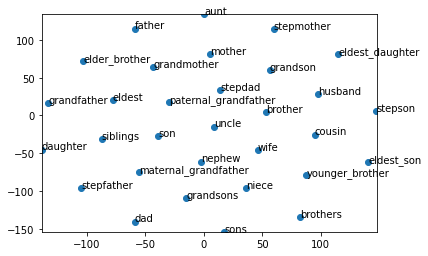

In [30]:
# Display word embeddings in two-dimensional space
display_tsne_reduction(word_embeddings, 'father')

## 9 Tips for further reading
The reading tips are the same as in the base notebook. If you read through the tips listed here, you'll acquire a profound understanding of the concepts covered in the two notebooks.  
- [Alammar, Jay (2019): The Illustrated Word2vec](http://jalammar.github.io/illustrated-word2vec/)
- [Collis, Jaron (2017): Glossary of Deep Learning: Word Embeddings](https://medium.com/deeper-learning/glossary-of-deep-learning-word-embedding-f90c3cec34ca)  
- [Jedamski, Derek (2020): Advanced NLP with Python for Machine Learning](https://www.linkedin.com/learning/advanced-nlp-with-python-for-machine-learning), LinkedIn Learning course (free for students of TH Köln)
- [McCormick, Chris (2016): Word2Vec Tutorial - The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)  
- [McCormick, Chris (2017): Word2Vec Tutorial Part 2 - Negative Sampling](http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/)
-[official gensim documentation](https://radimrehurek.com/gensim/auto_examples/core/run_core_concepts.html)